In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorqtl
import matplotlib.pyplot as plt
from tensorqtl import genotypeio, cis, trans
from sklearn.preprocessing import quantile_transform
from sklearn.linear_model import LinearRegression

/home/jpopp/.conda/envs/tensorqtl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Visualizing a cell type proportion QTL

### Myocytes in Heart LV

In [2]:
snp = 'chr22_46543361_T_C_b38'
tissue = 'Heart_Left_Ventricle'
celltype = 'Myocytes'

Load and wrangle genotypes

In [3]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 36.01it/s]


Load and wrangle cell type proportion data

In [4]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr22_46543361_T_C_b38', ylabel='Myocytes'>

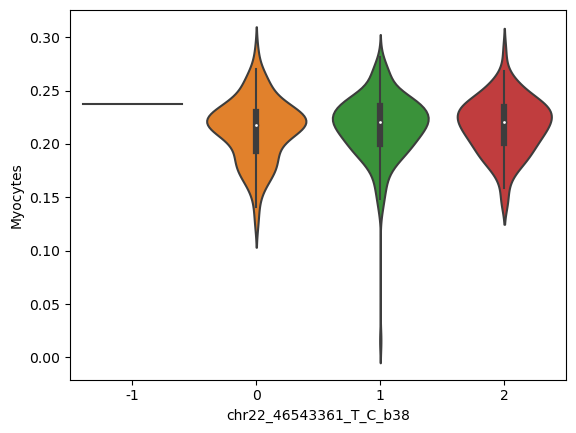

In [5]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

### Hepatocytes in Liver

In [6]:
snp = 'chr7_232170_C_T_b38'
tissue = 'Liver'
celltype = 'Hepatocytes'

In [7]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 64.84it/s]


In [8]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr7_232170_C_T_b38', ylabel='Hepatocytes'>

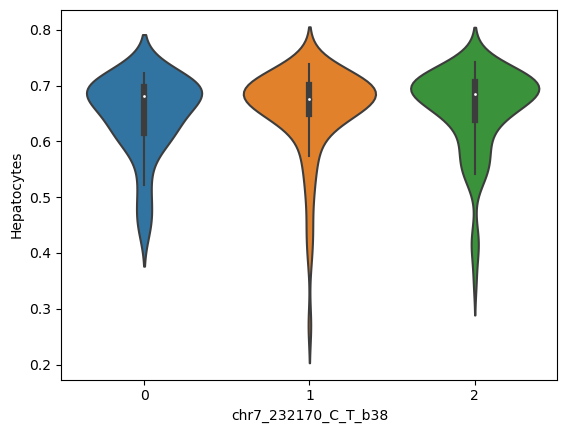

In [9]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

### Myocytes in Skeletal Muscle

In [11]:
snp = 'chr7_232170_C_T_b38'
tissue = 'Muscle_Skeletal'
celltype = 'Myocytes'

In [12]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 40.92it/s]


In [13]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr7_232170_C_T_b38', ylabel='Myocytes'>

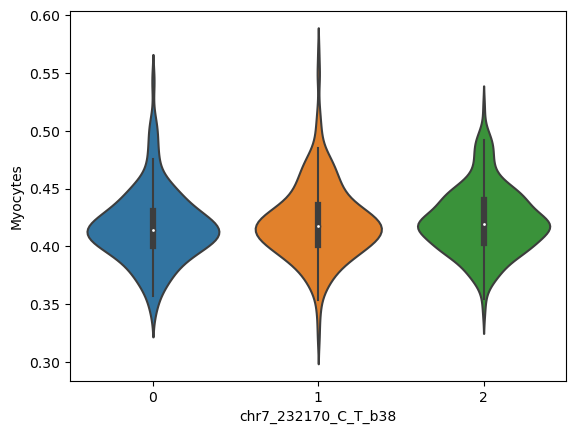

In [14]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

### Epithelial Cells in Skin

In [15]:
snp = 'chr5_33928797_T_G_b38'
tissue = 'Skin_Not_Sun_Exposed_Suprapubic'
celltype = 'Epithelial_cells'

In [16]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]].transpose()

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 179.13it/s]


In [17]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]].transpose()

<Axes: xlabel='chr5_33928797_T_G_b38', ylabel='Epithelial_cells'>

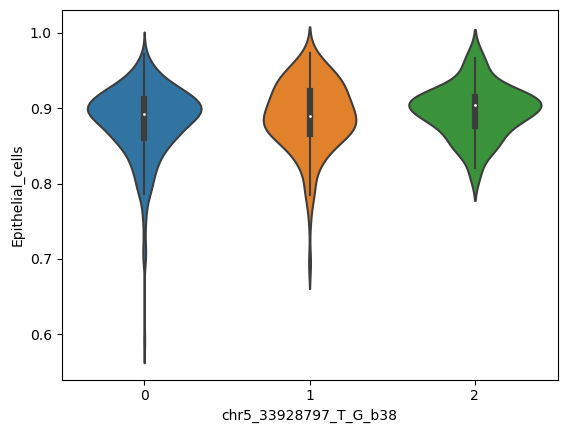

In [18]:
qtl_viz = qtl_genotypes.merge(qtl_props, how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

## Troubleshooting

This looks very wrong, need to understand why these are popping up as strong effects when they don't appear to be

In [19]:
snp = 'chr7_232170_C_T_b38'
tissue = 'Liver'
celltype = 'Hepatocytes'

In [54]:
snp = 'chr7_232170_C_T_b38'
tissue = 'Muscle_Skeletal'
celltype = 'Myocytes'

In [31]:
snp = 'chr12_123603441_G_C_b38'
tissue = 'Heart_Atrial_Appendage'
celltype = 'Myocytes'

In [37]:
snp = 'chr3_122199436_C_T_b38'
tissue = 'Brain_Hippocampus'
celltype = 'Neurons'

In [55]:
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink." + tissue + ".GOBP_TISSUE_DEVELOPMENT"
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
qtl_genotypes = genotype_df.loc[[snp]]

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 524.16it/s]


In [56]:
proportions_loc="../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-" + tissue + ".txt"
ctprops = pd.read_csv(proportions_loc, sep="\t").set_index('cell_type')
qtl_props = ctprops.loc[[celltype]]

In [57]:
donors_inc = qtl_genotypes.columns.intersection(qtl_props.columns)
qtl_genotypes = qtl_genotypes.loc[:, donors_inc]
qtl_props = qtl_props.loc[:, donors_inc]

In [58]:
trans.map_trans(genotype_df=qtl_genotypes, 
                phenotype_df=qtl_props,
                pval_threshold=1, maf_threshold=0.05,
                batch_size=20000)

trans-QTL mapping
  * 705 samples
  * 1 phenotypes
  * 1 variants
    processing batch 1/1
    elapsed time: 0.00 min
  * 1 variants passed MAF >= 0.05 filtering
done.


,variant_id,phenotype_id,pval,b,b_se,af
0,chr7_232170_C_T_b38,Myocytes,0.117373,0.002533,0.001616,0.580142


<Axes: xlabel='chr7_232170_C_T_b38', ylabel='Myocytes'>

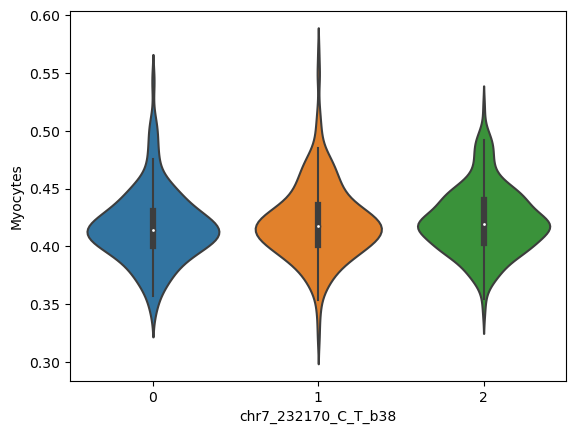

In [59]:
qtl_viz = qtl_genotypes.transpose().merge(qtl_props.transpose(), how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz, x=snp, y=celltype)

#### Evaluating the impact of normalization

In [60]:
qtl_props_norm = quantile_transform(qtl_props, axis=1, output_distribution='normal')
qtl_props_norm = pd.DataFrame(qtl_props_norm, index=qtl_props.index, columns=qtl_props.columns)

/home/jpopp/.conda/envs/tensorqtl/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (705). n_quantiles is set to n_samples.
  warnings.warn(


In [61]:
trans.map_trans(genotype_df=qtl_genotypes, 
                phenotype_df=qtl_props_norm,
                pval_threshold=1, maf_threshold=0.05,
                batch_size=20000)

trans-QTL mapping
  * 705 samples
  * 1 phenotypes
  * 1 variants
    processing batch 1/1
    elapsed time: 0.00 min
  * 1 variants passed MAF >= 0.05 filtering
done.


,variant_id,phenotype_id,pval,b,b_se,af
0,chr7_232170_C_T_b38,Myocytes,0.074854,0.095452,0.053504,0.580142


<Axes: xlabel='chr7_232170_C_T_b38', ylabel='Myocytes'>

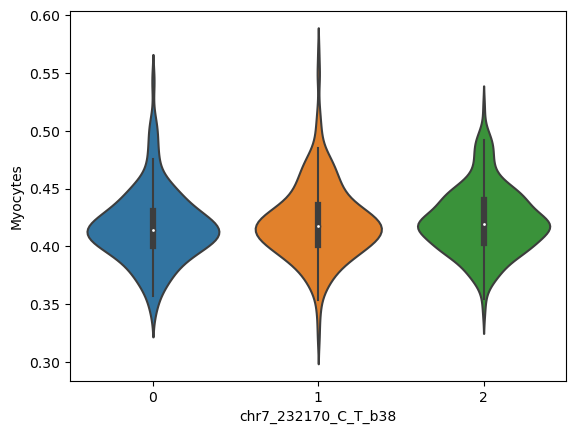

In [62]:
qtl_viz_norm = qtl_genotypes.transpose().merge(qtl_props.transpose(), how='inner', left_index=True, right_index=True)
sns.violinplot(qtl_viz_norm, x=snp, y=celltype)

#### Evaluating the impact of including covariates

In [73]:
covariates_file = "../../data/trans_qtl_calling/gtex/covariates/" + tissue + ".GOBP_TISSUE_DEVELOPMENT.supervised_surrogate_variables.txt"
covariates_df = pd.read_csv(covariates_file, sep='\t', index_col=0)
covariates_df = covariates_df.loc[covariates_df.index == snp, :].set_index('ID').T

In [74]:
covariates_df

ID,SV1,SV2,SV3,SV4,SV5,SV6,SV7,SV8,SV9,SV10,...,SV52,SV53,SV54,SV55,SV56,GENO_PC1,GENO_PC2,GENO_PC3,GENO_PC4,GENO_PC5
GTEX-111CU,0.049385,0.012213,0.003828,-0.023377,0.008925,-0.018838,0.028042,-0.005159,0.006052,-0.005351,...,0.012018,-0.015332,0.012256,0.006519,-0.010223,0.0107,-0.0026,0.0004,-0.0015,0.0112
GTEX-111FC,-0.061558,0.021778,0.029817,0.007570,-0.033706,-0.026797,0.035389,0.035323,-0.003496,-0.011020,...,0.029762,0.001638,0.005161,-0.024079,0.021914,0.0099,-0.0050,0.0304,0.0076,0.0347
GTEX-111VG,-0.048180,0.034859,0.007683,0.010204,-0.012321,-0.022424,-0.028310,-0.013477,0.005049,0.026967,...,0.004272,-0.020718,0.044829,0.018926,-0.026718,0.0144,-0.0081,0.0133,0.0035,0.0018
GTEX-111YS,0.034233,0.001799,-0.047075,-0.035140,0.009506,-0.038988,0.029018,0.036774,0.037593,0.063407,...,0.030290,-0.013861,-0.012496,-0.019416,0.045905,0.0154,-0.0093,0.0107,-0.0038,-0.0083
GTEX-1122O,0.056205,-0.016013,-0.019943,-0.006583,0.034062,-0.002522,0.012974,0.062883,0.058289,0.029034,...,0.038947,0.000034,-0.058362,-0.007849,0.014849,0.0139,-0.0097,0.0067,-0.0144,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYW4,-0.015438,-0.048992,-0.055695,0.075183,0.013402,-0.004522,-0.060190,0.036676,-0.063351,0.023857,...,-0.002284,0.035257,-0.001919,0.047354,-0.008847,-0.0245,0.2918,0.0227,0.1210,0.0376
GTEX-ZYY3,0.020374,-0.042665,0.006074,0.073424,0.016438,0.001863,-0.023823,-0.059111,-0.001574,0.035678,...,-0.064612,-0.009086,-0.058397,0.015437,0.019528,0.0111,-0.0048,-0.0795,-0.0113,0.0100
GTEX-ZZ64,0.019855,-0.009000,-0.041580,-0.051976,0.008384,-0.051415,-0.041654,0.040049,-0.031303,0.030496,...,-0.007202,0.015554,0.006387,0.023504,-0.044330,0.0137,-0.0048,0.0171,-0.0016,-0.0138
GTEX-ZZPT,0.007710,-0.093832,0.047131,-0.024474,-0.025113,0.013185,0.021076,0.031342,-0.042672,-0.027100,...,0.032778,-0.074620,0.044447,-0.028662,-0.054090,0.0158,-0.0043,0.0446,0.0277,-0.0995


In [75]:
trans.map_trans(genotype_df=qtl_genotypes, 
                phenotype_df=qtl_props_norm,
                covariates_df=covariates_df,
                pval_threshold=1, maf_threshold=0.05,
                batch_size=20000)

trans-QTL mapping
  * 705 samples
  * 1 phenotypes
  * 61 covariates
  * 1 variants
    processing batch 1/1
    elapsed time: 0.00 min
  * 1 variants passed MAF >= 0.05 filtering
done.


,variant_id,phenotype_id,pval,b,b_se,af
0,chr7_232170_C_T_b38,Myocytes,0.000053,0.126403,0.031063,0.580142


In [76]:
props_fitted = LinearRegression().fit(covariates_df, qtl_props.transpose())
props_residuals = qtl_props.transpose().values - props_fitted.predict(covariates_df)

genotypes_fitted = LinearRegression().fit(covariates_df, qtl_genotypes.transpose())
genotypes_residuals = qtl_genotypes.transpose().values - genotypes_fitted.predict(covariates_df)

In [77]:
qtl_viz['genotype_residuals']=genotypes_residuals
qtl_viz['props_residuals']=props_residuals
qtl_viz

,chr7_232170_C_T_b38,Myocytes,genotype_residuals,props_residuals
GTEX-111CU,1,0.4088,-0.051166,0.011954
GTEX-111FC,0,0.4245,-1.148900,0.004486
GTEX-111VG,1,0.4551,-0.251597,0.001001
GTEX-111YS,1,0.4079,-0.428878,0.006458
GTEX-1122O,2,0.3923,0.939690,-0.015854
...,...,...,...,...
GTEX-ZYW4,1,0.3863,0.212248,-0.012593
GTEX-ZYY3,2,0.4610,0.521006,0.017318
GTEX-ZZ64,0,0.3676,-1.223097,-0.009524
GTEX-ZZPT,0,0.3448,-0.996838,-0.060395


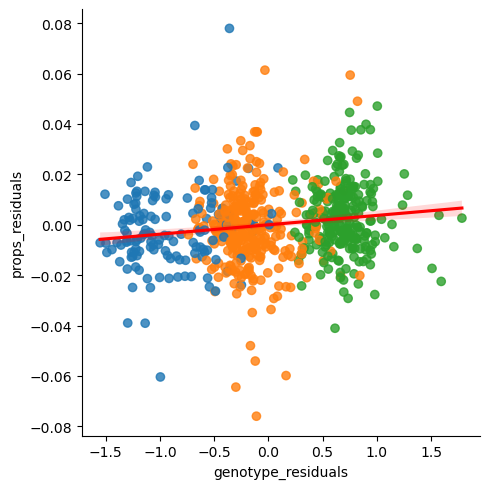

In [78]:
snp_palette = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}
snp_cols = [snp_palette[val] for val in qtl_viz[snp]]
sns.lmplot(qtl_viz, x='genotype_residuals', y='props_residuals', scatter_kws={'color': snp_cols}, line_kws={'color': 'red'})